# SUP ML 2 - MODEL

#### **Nombres**:
      Albert Fernández
      Julieta Kaplan
      Roger Torruella Vilchez
      Rory Thomson Nelson
      Santiago Ezequiel Velasco
#### **Fecha**: 27/12/2024

# Libraries

In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd

# # fechas
# import datetime as dt
# from datetime import datetime
# from dateutil.relativedelta import relativedelta

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# modelos
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier: el equivalente del Adaline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# interpretabilidad
import shap

# para visualizar mas columnas en un df
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

np.random.seed(42)

# Carga clean data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/DSC0924 – Entregable 2 - Fernández-Kaplan-Torruella-Thomson-Velasco/Pickle/ML1_Processing.pkl')
target = 'churn'

print("Definimos la variable 'churn' como el target")

Definimos la variable 'churn' como el target


# Features Importance

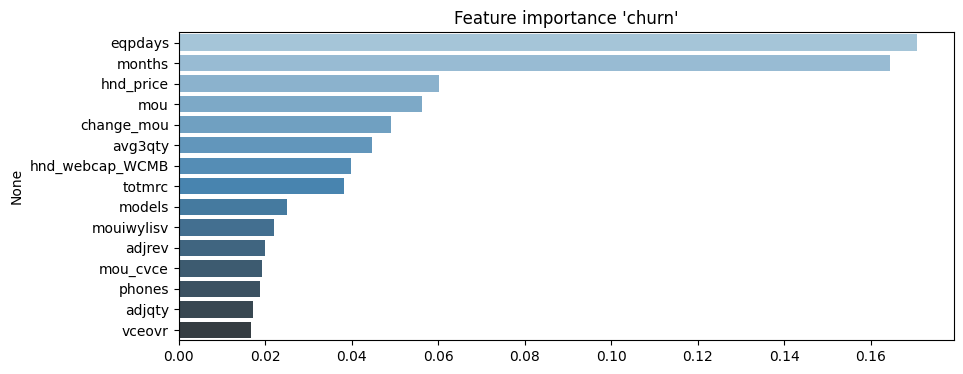

Identificamos y graficamos las 15 características más importantes según su contribución al modelo, ordenadas de mayor a menor.


In [ ]:
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}

x, y = df.drop(target,axis=1), df[target]
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plotea las 15 mejores Features importances
num_features = 15
features = clf.feature_importances_
columnas = x.columns
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)[:num_features]
plt.figure(figsize=(10,4))
plt.title("Feature importance '{}'".format(target))
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()

print("Identificamos y graficamos las 15 características más importantes según su contribución al modelo, ordenadas de mayor a menor.")


# Split X-y

In [ ]:
# se guarda la target como 'y' y las features como 'X'
y = df[target]
X = df.drop(target, axis=1)

print("Guardamos la target como 'y' y las features como 'X'")

Guardamos la target como 'y' y las features como 'X'


# Distribución del target

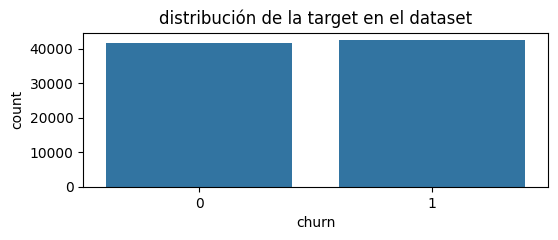

Visualizamos la distribución de la variable objetivo en el dataset mediante un gráfico de barras


In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(x=y)
plt.title('distribución de la target en el dataset')
plt.show()

print("Visualizamos la distribución de la variable objetivo en el dataset mediante un gráfico de barras")

In [ ]:
# repartición de la target en el dataset
y.value_counts(normalize=True).mul(100)

,proportion
churn,
1,50.574972
0,49.425028


# Undersampling (*)

No es necesario hacer undersamplig ya que la muestra del churn esta repartida de forma equitativa

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

# Split TRAIN-TEST

In [ ]:
# se utilizan 70% de los datos para entrenar el modelo y se guardan 30% de los datos para evaluar el modelo (de forma aleatoria)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('El nº observaciones del df de train es de:', len(y_train))
print('El nº observaciones del df de test es de:', len(y_test))

El nº observaciones del df de train es de: 58863
El nº observaciones del df de test es de: 25228


In [ ]:
# guardo las columnas del dataset en una lista antes de estandarizar
# el metodo scaler quita el nombre de las variables
# para la interpretabilidad, si el modelo ganador es un arbol de decisión, conviene guardar el nombre de las variables
variables_entrenadas = X.columns

In [ ]:
df_X_test = pd.DataFrame(X_test, columns=variables_entrenadas)
df_X_test

,HHstatin_C,HHstatin_I,HHstatin_Otros,HHstatin_UNKW,actvsubs,adjmou,adjqty,adjrev,adults,area_AS,area_C,area_CN,area_CST,area_D,area_DMV,area_GL,area_H,area_LA,area_M,area_NE,area_NF,area_NRM,area_NYC,area_O,area_P,area_S,area_SF,area_T,asl_flag,avg3qty,avg3rev,avg6rev,avgmou,avgqty,avgrev,blck_dat,blck_vce,callfwdv,callwait,ccrndmou,change_mou,change_rev,complete,crclscod_A,crclscod_AA,crclscod_BA,crclscod_CA,crclscod_EA,crclscod_Otros,creditcd,custcare,da,datovr,drop_blk,drop_dat,drop_vce,dualband,dwllsize_A,dwllsize_Otros,dwllsize_UNKW,dwlltype_M,dwlltype_S,dwlltype_UNKW,eqpdays,ethnic_G,ethnic_H,ethnic_N,ethnic_Otros,ethnic_S,ethnic_U,forgntvl,hnd_price,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,income,infobase_M,iwylis_vce,kid0_2,kid11_15,kid16_17,kid3_5,kid6_10,lor,marital_A,marital_B,marital_M,marital_S,marital_U,models,months,mou,mou_cdat,mou_cvce,mou_opkv,mou_pead,mou_peav,mou_rvce,mouiwylisv,mouowylisv,new_cell,numbcars,opk_dat,opk_vce,ownrent_own,owylis_vce,peak_dat,peak_vce,phones,plcd_dat,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_UNKW,recv_sms,recv_vce,refurb_new_refurb,roam,rv,threeway,totmrc,truck,unan_dat,unan_vce,uniqsubs,vceovr
34464,1,0,0,0,3,6820.0,3468,697.71,2.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,146,14,14.0,310.00,157.64,31.71,0.0,0.000000,0.0,1.000000,0.000000,91.25,-1.6300,94.333333,0,0,0,0,0,1,1,0.000000,1.2375,0.0000,4.000000,0.0,4.000000,1,0,1,0,1,0,0,691.0,0,0,0,1,0,0,0,79.989990,0,0,1,4.000000,1,23.000000,0,0,0,0,0,7.0,0,0,0,0,1,1.0,23,301.75,0.000000,98.973333,86.790000,0.00,88.130000,75.943333,37.350000,27.703333,1,1.0,0.000000,78.000000,1,37.000000,0.000000,65.666667,1.0,0.000000,0,0,0,0,1,0,0.0,54.666667,0,2.3725,0,0.000000,10.000,0,0.0,17.333333,3,0.000
58187,0,0,0,1,2,13154.0,5077,975.84,1.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,735,100,116.0,1461.56,564.11,108.43,0.0,4.333333,0.0,16.333333,4.333333,-34.25,-65.8425,288.000000,0,1,0,0,0,0,1,1.000000,0.7425,0.0000,34.000000,0.0,29.666667,1,0,0,1,0,0,1,117.0,0,0,0,1,0,0,0,9.989998,0,1,0,7.000000,1,44.333333,0,0,0,0,0,3.0,0,0,0,0,1,1.0,10,1491.25,0.000000,422.440000,247.686667,0.00,745.080000,570.323333,55.923333,108.050000,0,0.0,0.000000,150.000000,1,57.000000,0.000000,564.666667,2.0,0.000000,0,0,1,0,0,0,0.0,480.333333,1,3.5275,0,0.333333,10.000,0,0.0,181.666667,4,63.375
78059,0,0,0,1,1,1468.0,500,216.70,2.538935,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,111,36,36.0,244.67,83.33,36.12,0.0,0.000000,0.0,0.000000,0.000000,70.75,3.7875,112.333333,0,1,0,0,0,0,0,0.000000,0.2475,0.0000,2.666667,0.0,2.666667,1,0,0,1,0,0,1,201.0,0,0,1,0,0,0,0,149.989990,0,0,1,5.809548,0,0.000000,0,0,0,0,0,5.0,0,0,0,0,1,1.0,7,361.25,0.000000,230.893333,213.806667,0.00,47.510000,30.426667,0.000000,3.846667,0,0.0,0.000000,77.000000,1,20.000000,0.000000,44.000000,1.0,0.000000,0,0,1,0,0,0,0.0,10.000000,0,1.1200,0,0.000000,44.990,0,0.0,8.000000,1,0.000
57129,0,1,0,0,1,219.0,106,228.53,3.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20,21.0,19.91,9.64,20.78,0.0,0.000000,0.0,0.000000,0.000000,-1.00,0.0000,1.000000,0,1,0,0,0,0,1,0.000000,0.0000,0.0000,0.333333,0.0,0.333333,0,1,0,0,0,1,0,379.0,0,0,1,0,0,0,0,29.989990,1,0,0,7.000000,1,0.000000,1,0,0,0,0,3.0,1,0,0,0,0,1.0,12,1.00,0.000000,0.076667,0.000000,0.00,0.076667,0.000000,0.000000,0.000000,0,1.0,0.000000,0.000000,1,0.000000,0.000000,1.000000,1.0,0.000000,0,0,0,0,1,0,0.0,0.000000,0,0.0000,0,0.000000,29.990,1,0.0,1.333333,2,0.000
79855,0,0,0,1,1,4549.0,1319,324.17,2.538935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,140,36,36.0,505.44,146.56,36.02,0.0,14.000000,0.0,0.000000,19.666667,-261.50,-46.5350,89.333333,0,0,0,0,0,1,0,2.333333,0.2475,0.0975,17.000000,0.0,3.000000,1,0,0,1,0,0,1,68.0,0,0,0,0,1,0,0,129.989990,0,0,1,5.809548,0,0.666667,0,0,0,0,0,5.0,0,0,0,0,1,2.0,10,496.50,0.533333,328.726667,272.553333,0.00,124.066667,67.896667,0.123333,6.676667,0,0.0,0.666667,57.000000,1,9.000000,0.000000,43.000000,2.0,0.666667,0,1,0,0,0,0,0.0,11.666667,

# Rescaling

* NO NECESARIO en modelos de Arboles de Decisión.
* Guardar scaler en el model path.

In [ ]:
# se estandarizan las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)         # estandariza según la regla definida con el X_train, con la media de X_train

In [ ]:
pd.to_pickle(scaler,"/content/drive/MyDrive/DSC0924 – Entregable 2 - Fernández-Kaplan-Torruella-Thomson-Velasco/Pickle/scaler.pkl")

# TRAIN-VALIDA

## Torneo de Modelos

* Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [ ]:
modelos = []
modelos.append(('Perceptron', Perceptron(random_state=42)))
modelos.append(('SGDClassifier', SGDClassifier(loss='log_loss', random_state=42)))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)))
modelos.append(('XGBClassifier', XGBClassifier(random_state=42, verbosity=0)))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False, random_seed=42)))
modelos.append(('LogisticRegression', LogisticRegression(random_state=42)))


In [ ]:
metricas_modelos = pd.DataFrame(columns=['modelo', 'AUC'])

for nombre, modelo in modelos:

    # entrenamos el modelo
    modelo.fit(X_train, y_train)

    # hacemos la predicción sobre el dataset de test
    # al AUC se saca con predict_proba.
    # para el perceptron, usaremos decision_function, el equivalente del predict_proba para este algoritmo
    if nombre == 'Perceptron':
      y_pred = modelo.decision_function(X_test)
    else:
      y_pred = modelo.predict_proba(X_test)[:, 1]

    # calculamos el AUC
    auc = metrics.roc_auc_score(y_test, y_pred)

    # imprimimos el resultado por modelo
    metricas_modelos = pd.concat([metricas_modelos,
                                  pd.DataFrame({'modelo': nombre, 'AUC': auc}, index=[0])
                                  ])
    print(modelo, auc)

metricas_modelos.sort_values('AUC', ascending=False)


Perceptron(random_state=42) 0.5593765576128669
SGDClassifier(loss='log_loss', random_state=42) 0.6022141563148462
GradientBoostingClassifier(random_state=42) 0.6756340886808991
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 0.6701653079411245
<catboost.core.CatBoostClassifier object at 0x78

,modelo,AUC
0,CatBoostClassifier,0.689875
0,GradientBoostingClassifier,0.675634
0,XGBClassifier,0.670165
0,LogisticRegression,0.624374
0,SGDClassifier,0.602214
0,Perceptron,0.559377


In [ ]:
metricas_modelos = metricas_modelos.sort_values('AUC', ascending=False)
modelo_ganador = metricas_modelos.iloc[0]
nombre_modelo_ganador = modelo_ganador['modelo']
auc_modelo_ganador = modelo_ganador['AUC']

# Imprimimos el resultado
print("El modelo ganador es {} con un AUC de {:.3f}".format(nombre_modelo_ganador, auc_modelo_ganador))


El modelo ganador es CatBoostClassifier con un AUC de 0.690


## Hiperparametrizacion

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [ ]:
modelo = CatBoostClassifier()
print("Definimos que el modelo que utilizaremos será: {}".format(nombre_modelo_ganador))

Definimos que el modelo que utilizaremos será: CatBoostClassifier


In [ ]:
parameters = {
    'learning_rate': [0.005, 0.02, 0.1],
    'iterations': [300, 500],
    'max_depth': [3],
    'l2_leaf_reg': [6, 12],
    'colsample_bylevel': [0.85],
    'bagging_temperature': [0.5, 1.0],
    'eval_metric': ['AUC'],
    'verbose': [False]
}

In [ ]:
# Se prueban todas las combinaciones de parametros
modelo_grid = GridSearchCV(modelo,
                            parameters,
                            cv=2,
                            verbose=True)

modelo_grid.fit(X_train, y_train)

# Se imprime el modelo con los mejores parametros
print('mejores parametros:')
modelo_grid.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
mejores parametros:


{'bagging_temperature': 0.5,
 'colsample_bylevel': 0.85,
 'eval_metric': 'AUC',
 'iterations': 500,
 'l2_leaf_reg': 6,
 'learning_rate': 0.1,
 'max_depth': 3,
 'verbose': False}

In [ ]:
print("Hiperparametrizamos para ver si existen parametros que mejoren el modelo")


Hiperparametrizamos para ver si existen parametros que mejoren el modelo


In [ ]:
# selección del mejor modelo con los mejores parámetros, que son los estandar
modelo_hiper = CatBoostClassifier(
    bagging_temperature=0.5,
    colsample_bylevel=0.85,
    eval_metric='AUC',
    iterations=500,
    l2_leaf_reg=6,
    learning_rate=0.1,
    max_depth=3,
    verbose=False,
    random_state=42
)

# entrenamiento
modelo_hiper.fit(X_train, y_train)

print("Entrenamos el modelo con los mejores parametros para ver si mejora el AUC")

Entrenamos el modelo con los mejores parametros para ver si mejora el AUC


In [ ]:
# evalucación sobre el dataset de test

# predicción en el dataset de test
y_pred_test_hiper = modelo_hiper.predict_proba(X_test)

# evaluación de la métrica
auc_test_hiper = metrics.roc_auc_score(y_test, y_pred_test_hiper[:,1])

print("El AUC con el modelo hiperparametrizado sobre el df_test es de: {:.5f}".format(auc_test_hiper))

El AUC con el modelo hiperparametrizado sobre el df_test es de: 0.68474


In [ ]:
print(
    "Con los mejores parámetros obtenidos del hiperparametrizado, llegamos a un AUC de {:.5f},\n"
    "por lo que, concluimos que los parámetros estándar de CatBoostClassifier al obtener un AUC de {:.5f},\n"
    "son mejores que los obtenidos por el hiperparametrizado.\n"
    "Conclusión: procedemos con el modelo con los parámetros estándar.".format(auc_test_hiper, auc_modelo_ganador)
)


Con los mejores parámetros obtenidos del hiperparametrizado, llegamos a un AUC de 0.68474,
por lo que, concluimos que los parámetros estándar de CatBoostClassifier al obtener un AUC de 0.68987,
son mejores que los obtenidos por el hiperparametrizado.
Conclusión: procedemos con el modelo con los parámetros estándar.


## Modelo final

* Entrenar el modelo final con el algoritmo y los parametros que han funcionado mejor en anteriores experimentos.
* Argumentar la elección.
* Guardar el modelo en model path.

In [ ]:
# selección del mejor modelo con los mejores parámetros, que son los estandar
modelo =  CatBoostClassifier(verbose=False,random_state=42)

# entrenamiento
modelo.fit(X_train, y_train)

print("Entrenamos el modelo con los parametros estandar del modelo")

Entrenamos el modelo con los parametros estandar del modelo


In [ ]:
pd.to_pickle(modelo,"/content/drive/MyDrive/DSC0924 – Entregable 2 - Fernández-Kaplan-Torruella-Thomson-Velasco/Pickle/modelo.pkl")

print("Guardamos el modelo en un pickle para usarlo más adelante")

Guardamos el modelo en un pickle para usarlo más adelante


# TEST

* Evaluación de las métricas de performance en TEST.

In [ ]:
# evalucación sobre el dataset de train

# predicción en el dataset de train
y_pred_train = modelo.predict_proba(X_train)

# evaluación de la métrica
auc_train = metrics.roc_auc_score(y_train, y_pred_train[:,1])


print("El AUC sobre el df_train es de: {:.5f}".format(auc_train))


El AUC sobre el df_train es de: 0.81436


In [ ]:
# evalucación sobre el dataset de test

# predicción en el dataset de test
y_pred_test = modelo.predict_proba(X_test)

# evaluación de la métrica
auc_test = metrics.roc_auc_score(y_test, y_pred_test[:,1])

print("El AUC sobre el df_test es de: {:.5f}".format(auc_test))


El AUC sobre el df_test es de: 0.68987


# INTERPRETABILITY

* Analizamos top features del modelo y su peso en el modelo.
* Plotear SHAP values y el impacto positivo/negativo.
* Comentar las top5 features, su impacto en el target y extraer insights.
* Analisis complementarios:
  * Modelos de arboles: Feature Importances, plot de arbol de decision.
  * Modelos lineales: Coeficentes y formula del modelo.

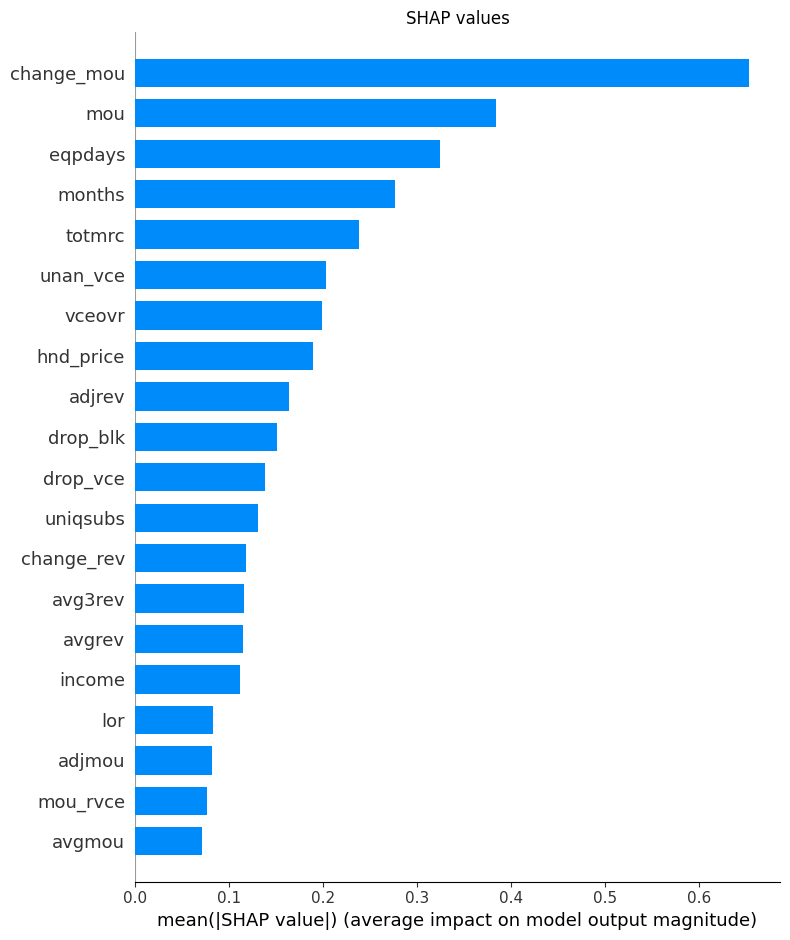

Las 5 features más importantes según los valores SHAP son:
change_mou: 0.6538
mou: 0.3844
eqpdays: 0.3247
months: 0.2765
totmrc: 0.2383


In [ ]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(df_X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, df_X_test, plot_type="bar", max_display=20)

# Calcular la importancia promedio de cada característica (absoluta)
importancia_shap = pd.DataFrame({
    'feature': df_X_test.columns,
    'importance': np.abs(shap_values).mean(axis=0)
}).sort_values(by='importance', ascending=False)

# Seleccionar las 5 características más importantes
top_features = importancia_shap.head(5)

# Imprimir las 5 características principales
print("Las 5 features más importantes según los valores SHAP son:")
for i, row in top_features.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

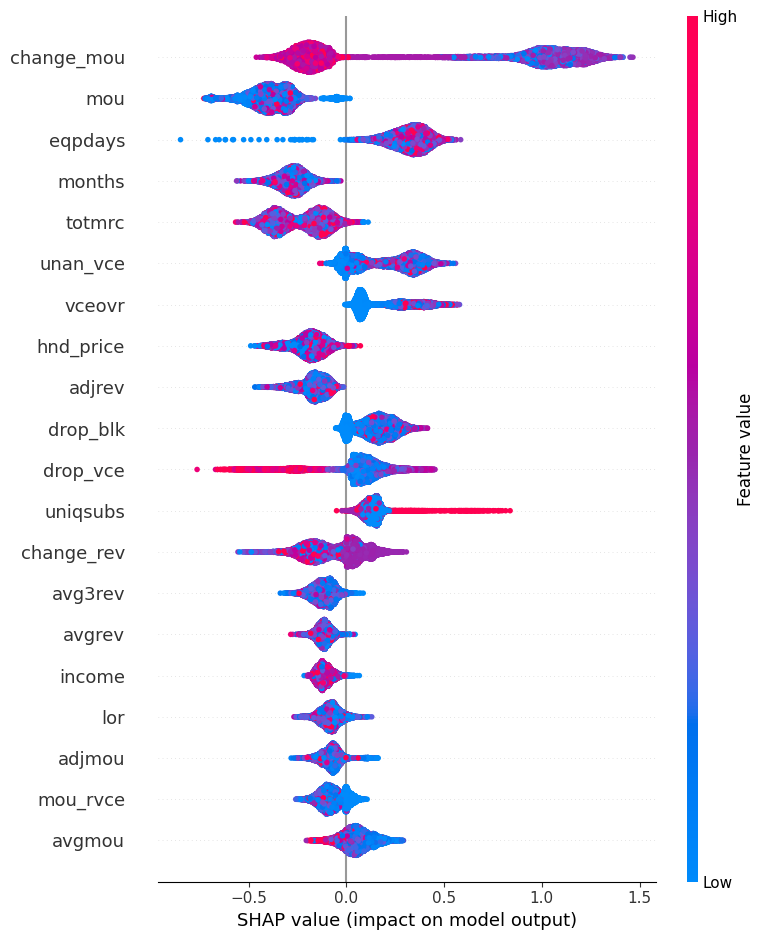

In [ ]:
shap.summary_plot(shap_values, df_X_test)

- change_mou: Los cambios drásticos (positivos o negativos) tienen un alto impacto en la decisión del cliente. Un aumento considerable en el uso puede indicar satisfacción, mientras que una disminución puede ser un indicador de desinterés o migración hacia otras opciones. Podemos ver que una gran cantidad de registros con valores altos (rojos) se encuentran en valores SHAP negativos, con esto podriamos deducir que un alto cambio en en el uso de minutos disminuye la posibilidad abandonar por lo tanto el churn del registro seria de churn = 0, es decir las personas que aumentan su uso estan satisfechas con el servisio y son menos propensas a abandonar.

- months (Número total de meses de servicio): Los clientes con mayor antigüedad tienden a mostrar menor probabilidad de abandono. Los nuevos clientes tienen un mayor riesgo de deserción, reflejando una necesidad de mayor atención en los primeros meses. Podemos ver que una mayor concentracion de registros con valores altos (rojos) se encuentran en valores Shap negativos más extremos, lo que sugiere que esos clientes con el numero total de meses de servicio más elevados tiene una menor probabilidad de churn (churn =0), se puede apreciar ligeramente que hay más valores altos (rojos) en el extremo negativo.

- mou (Número medio de minutos mensuales de uso): Un uso elevado suele estar asociado con clientes comprometidos. Niveles bajos de uso podrían estar relacionados con insatisfacción o menor dependencia del servicio. Podemos observar que una mayor concentración de registros con valores altos de mou (rojo) está asociada con valores SHAP negativos cercanos a 0. Esto indica que los clientes con mayor número medio de minutos mensuales de uso tienen una menor probabilidad de churn (churn=0). Aunque el impacto de esta característica en la predicción no es extremo, su relación con una menor probabilidad de churn es constante, lo que sugiere que un mayor uso mensual está relacionado con una mayor satisfacción o lealtad al servicio.

- hnd_price (Precio actual del teléfono): Clientes con dispositivos de mayor precio tienden a mostrar más lealtad, probablemente debido a un mayor compromiso financiero. Dispositivos más económicos podrían correlacionarse con mayor propensión al abandono. Podemos ver que a pesar de ser un atributo que es muy homogeneo una mayor concentracion de registros con valores altos (rojos) se encuentran en valores Shap negativos más cercano al 0, lo que sugiere que esos clientes con el precio actual del teléfono más elevados tiene una probabilidad de churn (churn =0) a pesar de tener un impacto menor en la predicción.

- eqpdays (Días desde la última actualización del equipo):  Equipos más antiguos suelen estar asociados con mayor probabilidad de abandono, ya que pueden reflejar menor interés en actualizarse o insatisfacción. Equipos recientes indican mayor compromiso y menor probabilidad de deserciónPodemos observar que registros con los valores altos de eqpdays (rojos) estan asociados a valores SHAP positivos, lo que sugiere que los clientes con equipos más antiguos tienen más probabilidad de churn (churn=1), esto suguiere que cuando alguien tiene un equipo más antiguo tiene mayor tendencia a abandonar.

#### Insights de negocio:

- Las principales características que indican menor probabilidad de churn son: un alto cambio en el uso de minutos (change_mou), mayor antigüedad en el servicio (months altos) y un alto promedio mensual de minutos (mou altos), precio del telefono (hnd_price bajo),  equipos recientes (eqpdays bajos).

- Promover actualizaciones de equipos en clientes con eqpdays altos.
Ofrecer incentivos o beneficios a clientes con change_mou bajos o mou bajos para reactivar su interés en el servicio.

- Prestar mayor atencion y servicio a los clientes nuevos (con promociones, descuentos, programas de fidelidad) para lograr su fidelizacion.